# Machine Learning Framework that can Support real time descision making based on application insight to predic server and application Failure by leveraging data collected by various DevOps Impelmentations.

Import basic Python Library for Data cleaning and Mining

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
df = pd.read_csv("C:/Users/rimanshu/Desktop/Jupyter/raw_data/POC/server data.csv")
df.head()

,DateTime,cpu %user,cpu %nice,cpu %sys,cpu %iowait,cpu %steal,%idle,Total Memory,Used Memory,Free Memory,Shared Memory,Buffers Memory,Cached Memory,Load-1Min,Load-5Min,Load-15Min,Server Status
0,08-04-2019 23:55,17.35,0.0,13.27,0.00,0,69.39,7823,5036,1111,283,1674,2144,0.01,0.06,0.10,Normal
1,09-04-2019 00:00,4.00,0.0,8.50,0.00,0,87.50,7823,5021,1126,283,1675,2159,0.06,0.06,0.08,Normal
2,09-04-2019 00:05,9.05,0.0,16.08,30.65,0,44.22,7823,5025,1109,283,1688,2156,0.07,0.05,0.07,Normal
3,09-04-2019 00:10,3.05,0.0,9.64,0.00,0,87.31,7823,5023,824,283,1974,2158,0.00,0.04,0.05,Normal
4,09-04-2019 00:15,11.62,0.0,34.85,13.64,0,39.90,7823,5027,814,283,1981,2154,0.21,0.14,0.08,Normal


# Convert all features(columns) to numeric and float(Decimal)

In [66]:
#df.info()
df.convert_objects(convert_numeric=True)
df.info() # Get Information of datatypes and number of valid values or rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1735 entries, 0 to 1734
Data columns (total 17 columns):
DateTime          1735 non-null object
cpu %user         1735 non-null float64
cpu %nice         1735 non-null float64
cpu %sys          1735 non-null float64
cpu %iowait       1735 non-null float64
cpu %steal        1735 non-null int64
%idle             1735 non-null float64
Total Memory      1735 non-null int64
Used Memory       1735 non-null int64
Free Memory       1735 non-null int64
Shared Memory     1735 non-null int64
Buffers Memory    1735 non-null int64
Cached Memory     1735 non-null int64
Load-1Min         1735 non-null float64
Load-5Min         1735 non-null float64
Load-15Min        1735 non-null float64
Server Status     1735 non-null object
dtypes: float64(8), int64(7), object(2)
memory usage: 230.5+ KB


In [67]:
# df.info()
df.sort_values(by=['Load-5Min'],ascending=False).head() #Sort the dataframe on basis of Load-5Min

,DateTime,cpu %user,cpu %nice,cpu %sys,cpu %iowait,cpu %steal,%idle,Total Memory,Used Memory,Free Memory,Shared Memory,Buffers Memory,Cached Memory,Load-1Min,Load-5Min,Load-15Min,Server Status
153,09-04-2019 12:45,4.57,0.0,12.18,0.0,0,83.25,7823,5814,304,283,1703,1355,1.74,1.04,0.77,Critical
1022,12-04-2019 12:50,3.54,0.0,10.10,0.0,0,86.36,7823,5534,498,285,1790,1637,1.67,1.00,0.74,Warning
124,09-04-2019 10:15,47.52,0.0,13.86,0.0,0,38.61,7823,5555,278,283,1989,1619,1.17,0.97,0.69,Warning
788,11-04-2019 17:30,5.05,0.0,9.60,0.0,0,85.35,7823,5213,854,285,1754,1961,0.93,0.89,0.65,Warning
1007,12-04-2019 11:35,5.76,0.0,7.85,0.0,0,86.39,7823,5799,256,285,1767,1369,0.67,0.88,0.68,Critical


# Calculate the Percent of used CPU usage

In [68]:
df['Used_Memory_%'] = (df['Used Memory']/df['Total Memory'])*100
print(df.head())

           DateTime  cpu %user  cpu %nice  cpu %sys  cpu %iowait  cpu %steal  \
0  08-04-2019 23:55      17.35        0.0     13.27         0.00           0   
1  09-04-2019 00:00       4.00        0.0      8.50         0.00           0   
2  09-04-2019 00:05       9.05        0.0     16.08        30.65           0   
3  09-04-2019 00:10       3.05        0.0      9.64         0.00           0   
4  09-04-2019 00:15      11.62        0.0     34.85        13.64           0   

   %idle  Total Memory  Used Memory  Free Memory  Shared Memory  \
0  69.39          7823         5036         1111            283   
1  87.50          7823         5021         1126            283   
2  44.22          7823         5025         1109            283   
3  87.31          7823         5023          824            283   
4  39.90          7823         5027          814            283   

   Buffers Memory  Cached Memory  Load-1Min  Load-5Min  Load-15Min  \
0            1674           2144       0.01   

# Calculate the Total CPU time since boot

In [69]:
df['Total CPU time since boot'] = df['cpu %user'] + df['cpu %nice'] + df['cpu %iowait'] + df['cpu %sys'] + df['%idle']
print(df.head())

           DateTime  cpu %user  cpu %nice  cpu %sys  cpu %iowait  cpu %steal  \
0  08-04-2019 23:55      17.35        0.0     13.27         0.00           0   
1  09-04-2019 00:00       4.00        0.0      8.50         0.00           0   
2  09-04-2019 00:05       9.05        0.0     16.08        30.65           0   
3  09-04-2019 00:10       3.05        0.0      9.64         0.00           0   
4  09-04-2019 00:15      11.62        0.0     34.85        13.64           0   

   %idle  Total Memory  Used Memory  Free Memory  Shared Memory  \
0  69.39          7823         5036         1111            283   
1  87.50          7823         5021         1126            283   
2  44.22          7823         5025         1109            283   
3  87.31          7823         5023          824            283   
4  39.90          7823         5027          814            283   

   Buffers Memory  Cached Memory  Load-1Min  Load-5Min  Load-15Min  \
0            1674           2144       0.01   

# Calculate Total CPU Idle time since boot

In [70]:
df['Total CPU Idle time since boot'] = df['cpu %iowait'] + df['%idle']
print(df.head())

           DateTime  cpu %user  cpu %nice  cpu %sys  cpu %iowait  cpu %steal  \
0  08-04-2019 23:55      17.35        0.0     13.27         0.00           0   
1  09-04-2019 00:00       4.00        0.0      8.50         0.00           0   
2  09-04-2019 00:05       9.05        0.0     16.08        30.65           0   
3  09-04-2019 00:10       3.05        0.0      9.64         0.00           0   
4  09-04-2019 00:15      11.62        0.0     34.85        13.64           0   

   %idle  Total Memory  Used Memory  Free Memory  Shared Memory  \
0  69.39          7823         5036         1111            283   
1  87.50          7823         5021         1126            283   
2  44.22          7823         5025         1109            283   
3  87.31          7823         5023          824            283   
4  39.90          7823         5027          814            283   

   Buffers Memory  Cached Memory  Load-1Min  Load-5Min  Load-15Min  \
0            1674           2144       0.01   

# Calculate Total CPU usage time since boot

In [71]:
df['Total CPU usage time since boot'] = df['Total CPU time since boot'] - df['Total CPU Idle time since boot']
print(df.head())

           DateTime  cpu %user  cpu %nice  cpu %sys  cpu %iowait  cpu %steal  \
0  08-04-2019 23:55      17.35        0.0     13.27         0.00           0   
1  09-04-2019 00:00       4.00        0.0      8.50         0.00           0   
2  09-04-2019 00:05       9.05        0.0     16.08        30.65           0   
3  09-04-2019 00:10       3.05        0.0      9.64         0.00           0   
4  09-04-2019 00:15      11.62        0.0     34.85        13.64           0   

   %idle  Total Memory  Used Memory  Free Memory  \
0  69.39          7823         5036         1111   
1  87.50          7823         5021         1126   
2  44.22          7823         5025         1109   
3  87.31          7823         5023          824   
4  39.90          7823         5027          814   

                ...                 Buffers Memory  Cached Memory  Load-1Min  \
0               ...                           1674           2144       0.01   
1               ...                           

# Calculate the Total CPU Percentage

In [72]:
df['Total CPU percentage'] = (df['Total CPU usage time since boot']/df['Total CPU time since boot'])*100
print(df.head())

           DateTime  cpu %user  cpu %nice  cpu %sys  cpu %iowait  cpu %steal  \
0  08-04-2019 23:55      17.35        0.0     13.27         0.00           0   
1  09-04-2019 00:00       4.00        0.0      8.50         0.00           0   
2  09-04-2019 00:05       9.05        0.0     16.08        30.65           0   
3  09-04-2019 00:10       3.05        0.0      9.64         0.00           0   
4  09-04-2019 00:15      11.62        0.0     34.85        13.64           0   

   %idle  Total Memory  Used Memory  Free Memory          ...           \
0  69.39          7823         5036         1111          ...            
1  87.50          7823         5021         1126          ...            
2  44.22          7823         5025         1109          ...            
3  87.31          7823         5023          824          ...            
4  39.90          7823         5027          814          ...            

   Cached Memory  Load-1Min  Load-5Min  Load-15Min  Server Status  \
0    

# Drop irrelevant Features or column for Machine Learning Model

In [73]:
df.drop(['cpu %user','cpu %nice',  'cpu %sys',  'cpu %iowait',  '%idle','Shared Memory','Buffers Memory','Cached Memory','cpu %steal','Total Memory'], axis=1, inplace=True)

In [74]:
df.head()

,DateTime,Used Memory,Free Memory,Load-1Min,Load-5Min,Load-15Min,Server Status,Used_Memory_%,Total CPU time since boot,Total CPU Idle time since boot,Total CPU usage time since boot,Total CPU percentage
0,08-04-2019 23:55,5036,1111,0.01,0.06,0.10,Normal,64.374281,100.01,69.39,30.62,30.616938
1,09-04-2019 00:00,5021,1126,0.06,0.06,0.08,Normal,64.182539,100.00,87.50,12.50,12.500000
2,09-04-2019 00:05,5025,1109,0.07,0.05,0.07,Normal,64.233670,100.00,74.87,25.13,25.130000
3,09-04-2019 00:10,5023,824,0.00,0.04,0.05,Normal,64.208104,100.00,87.31,12.69,12.690000
4,09-04-2019 00:15,5027,814,0.21,0.14,0.08,Normal,64.259236,100.01,53.54,46.47,46.465353


In [75]:
# Percentage of distribution of classes at Load Server Status
df['Server Status'].value_counts(normalize=True)*100

Normal      65.244957
Warning     32.737752
Critical     2.017291
Name: Server Status, dtype: float64

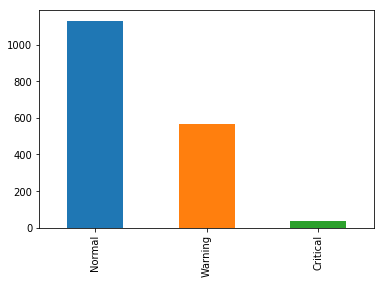

In [76]:
df['Server Status'].value_counts().plot.bar()

# Define the correlation or importance of the Features with each other.

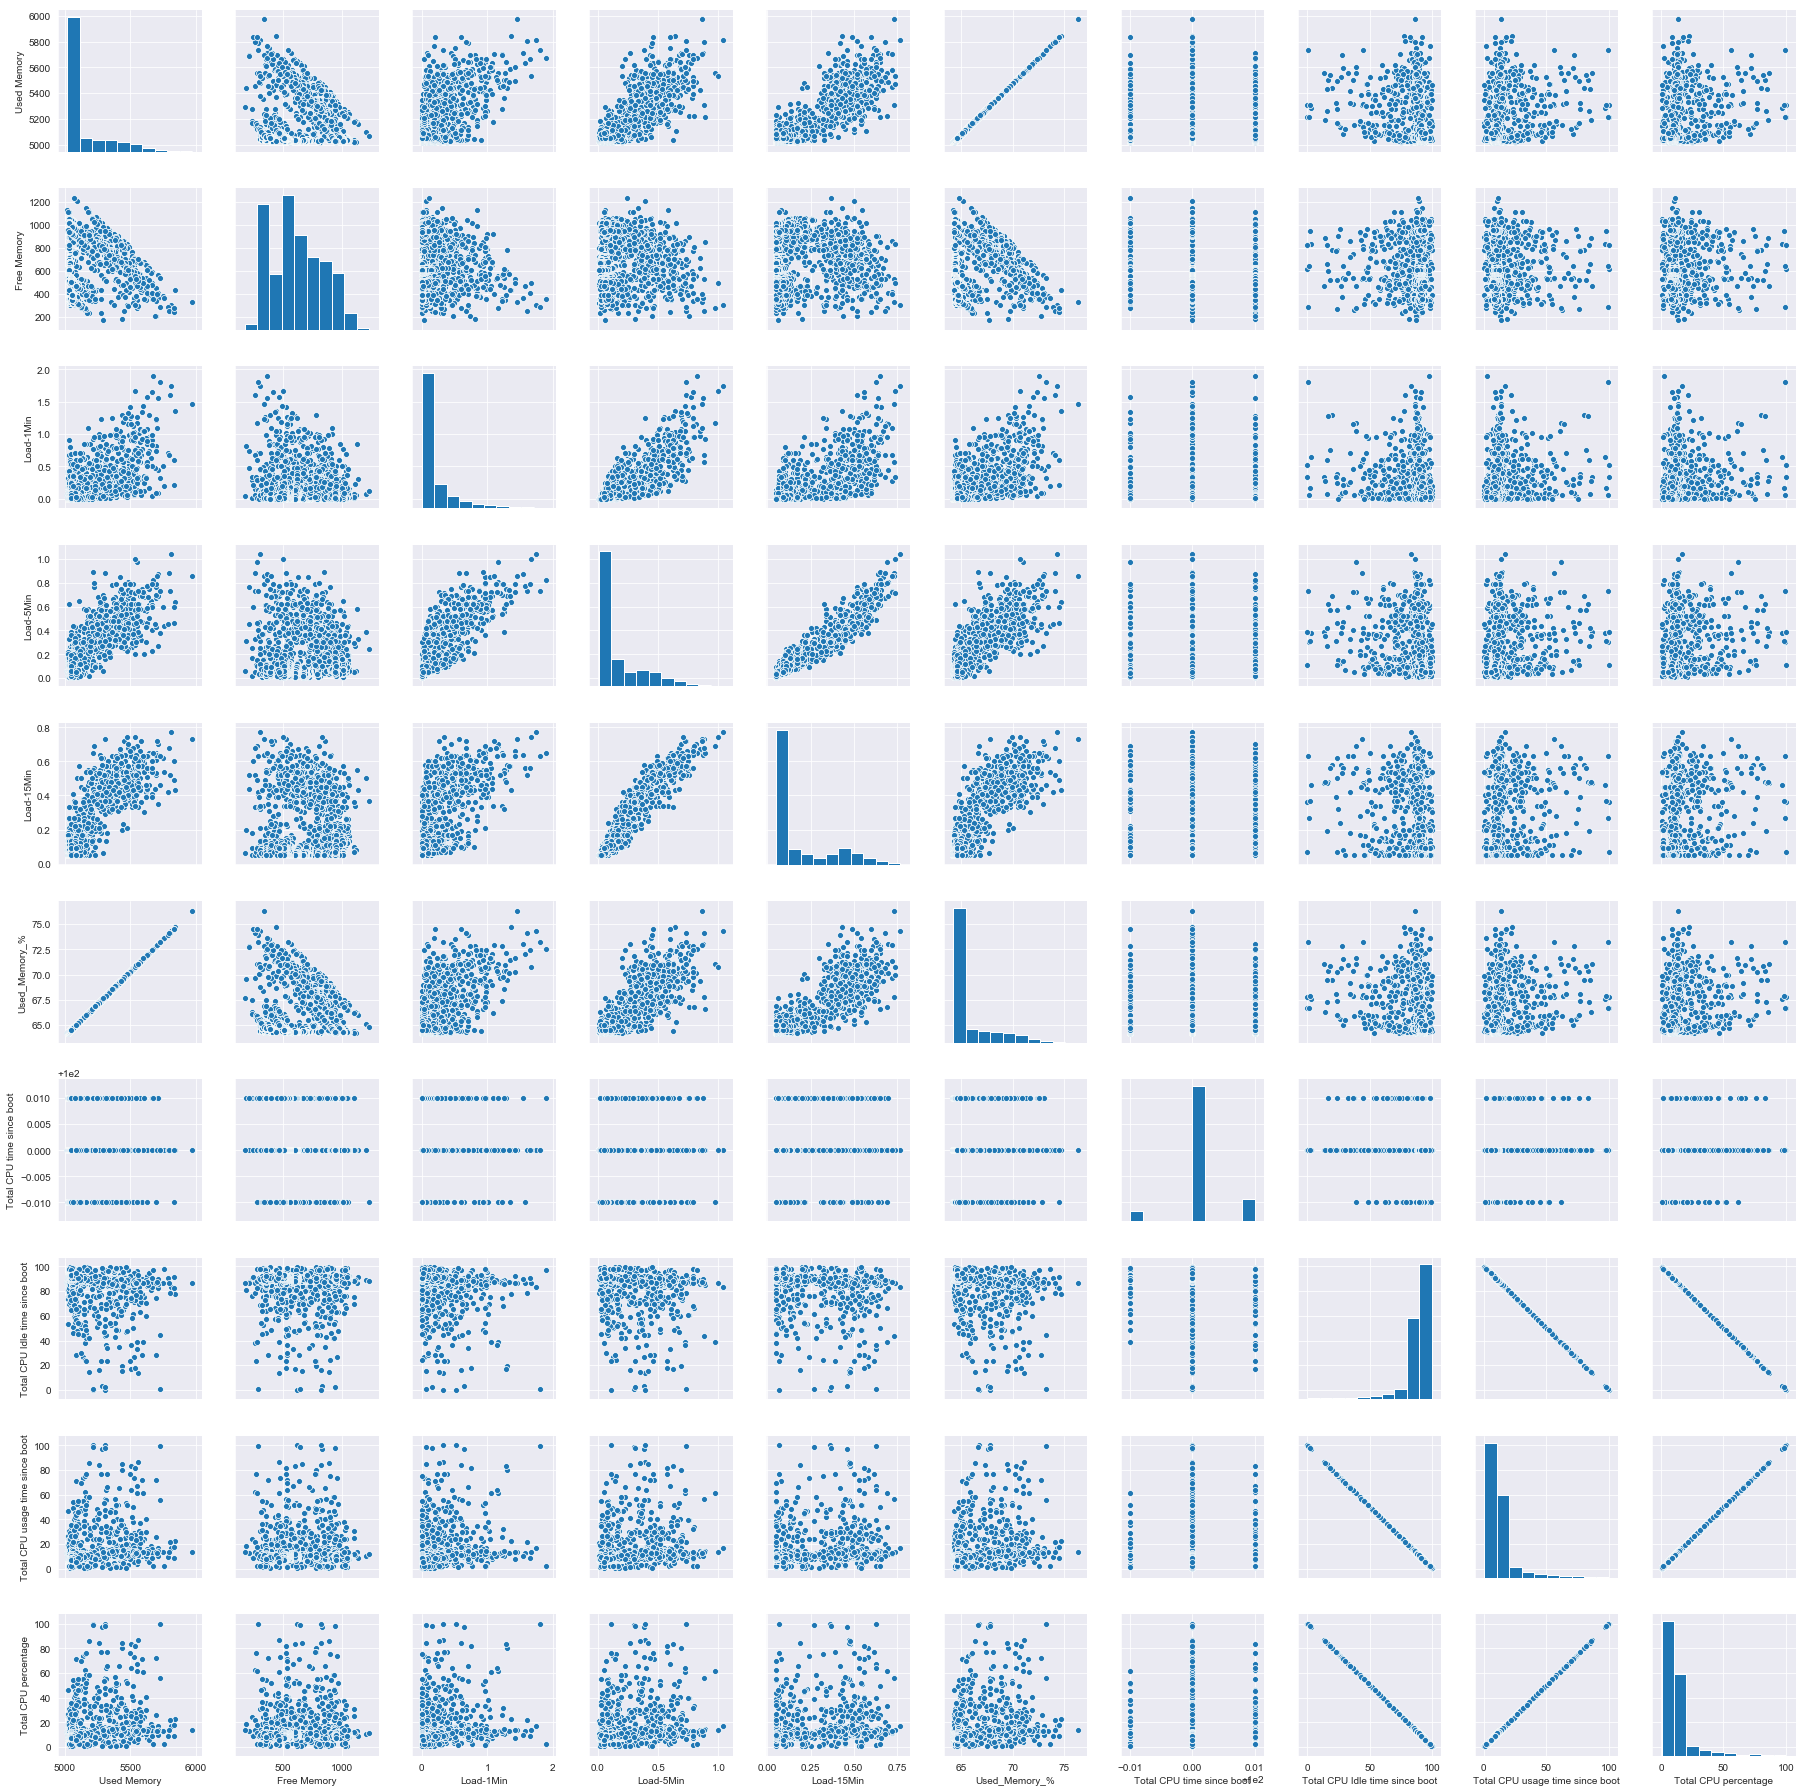

In [226]:
sns.pairplot(df, palette="husl")

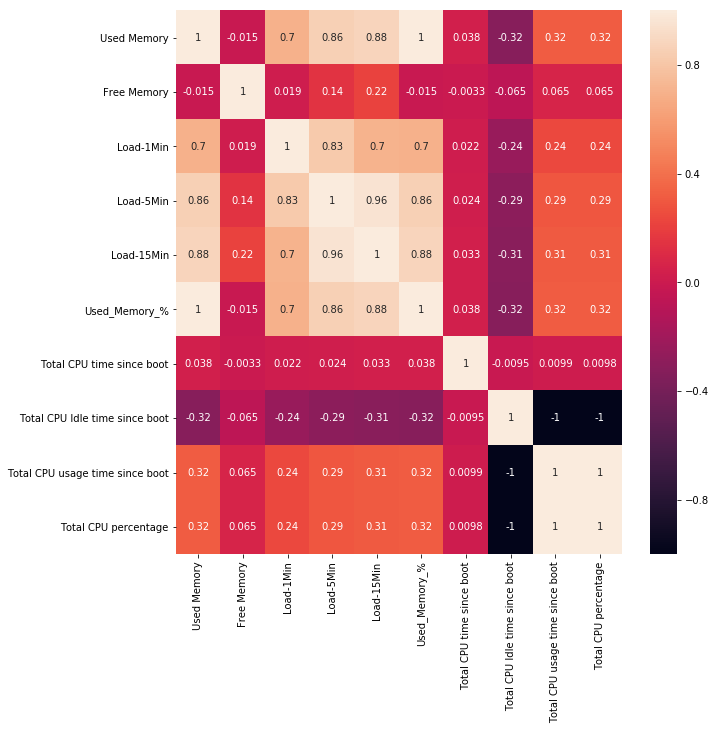

In [77]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap( df.corr(), annot=True, ax=ax )

# Above Correlation Graphs shows "Used Memory %" and "Total CPU usage Percentage" is highly correlated or positvely dependent on Load-5 Mins Column.

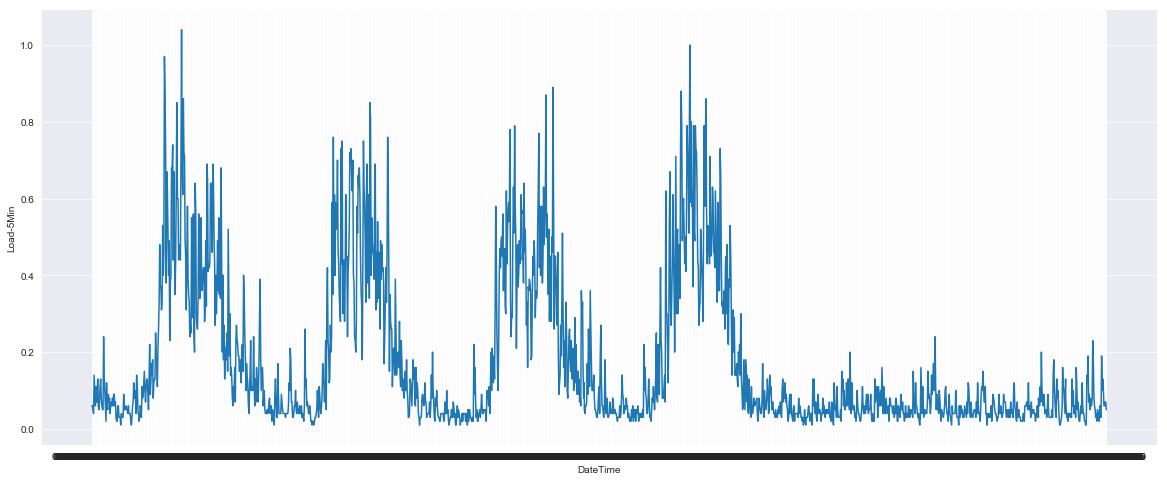

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plot_df = df
sns.set_style("darkgrid")
plt.figure(figsize=(20, 8))
plt.plot(plot_df['DateTime'], plot_df['Load-5Min'])
plt.ylabel('Load-5Min')
plt.xlabel('DateTime')
sns.despine()

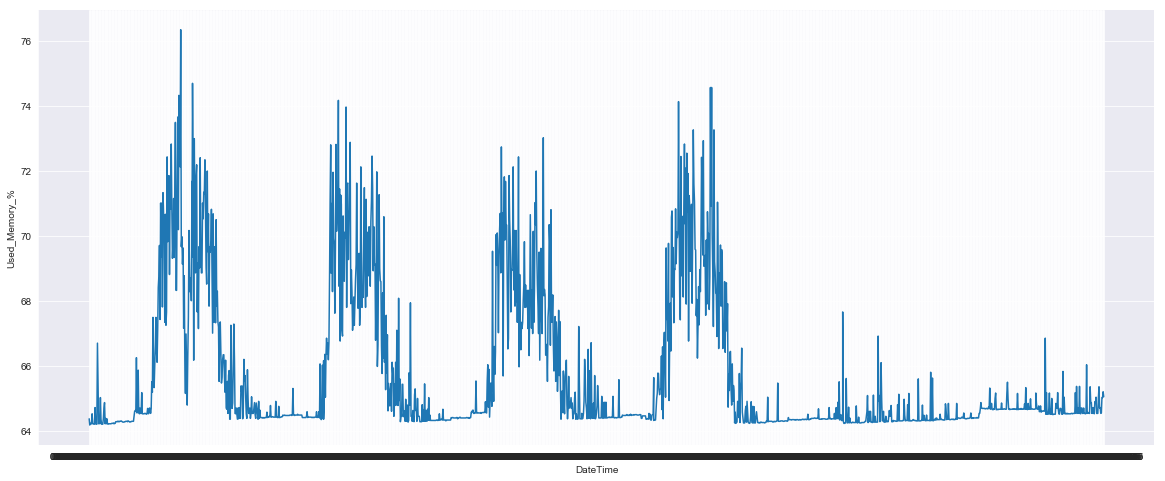

In [476]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plot_df = df
sns.set_style("darkgrid")
plt.figure(figsize=(20, 8))
plt.plot(plot_df['DateTime'], plot_df['Used_Memory_%'])
plt.ylabel('Used_Memory_%')
plt.xlabel('DateTime')
sns.despine()

In [78]:
#df.loc[df['Used Memory'].idxmax()]
df.convert_objects(convert_numeric=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1735 entries, 0 to 1734
Data columns (total 12 columns):
DateTime                           1735 non-null object
Used Memory                        1735 non-null int64
Free Memory                        1735 non-null int64
Load-1Min                          1735 non-null float64
Load-5Min                          1735 non-null float64
Load-15Min                         1735 non-null float64
Server Status                      1735 non-null object
Used_Memory_%                      1735 non-null float64
Total CPU time since boot          1735 non-null float64
Total CPU Idle time since boot     1735 non-null float64
Total CPU usage time since boot    1735 non-null float64
Total CPU percentage               1735 non-null float64
dtypes: float64(8), int64(2), object(2)
memory usage: 162.7+ KB


# Making Model and splitting dataset for training and testing

In [79]:
df.columns # Coulmns available in dataframe

Index(['DateTime', 'Used Memory', 'Free Memory', 'Load-1Min', 'Load-5Min',
       'Load-15Min', 'Server Status', 'Used_Memory_%',
       'Total CPU time since boot', 'Total CPU Idle time since boot',
       'Total CPU usage time since boot', 'Total CPU percentage'],
      dtype='object')

# Splitting the data into 70:30 ratio with equal distribution of classes of Load Status by stratify Parameter and Train them and Test it.

In [80]:
from sklearn.model_selection import train_test_split
X = df.drop(["Server Status","DateTime"], axis =1)
y = df["Server Status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify = y)

In [81]:
len(X_train) # Count of training samples

1214

In [82]:
len(y_test) # Count of test samples

521

# Test and Check the accuracy/Confidence score of multiple Machine Learning Algoriths to select best out of them.

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import model_selection


# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('K-NN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC()))

# Show Accuracy Score and Variance against It

In [84]:
import warnings
warnings.filterwarnings("ignore")
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=42)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.967057 (0.016901)
K-NN: 0.981087 (0.014238)
NB: 0.950562 (0.018126)
RF: 0.996708 (0.004032)
SVM: 0.871481 (0.020400)


# Show Graphically Comparing between Algorithm to Visualize Better

[Text(0,0,'LR'),
 Text(0,0,'K-NN'),
 Text(0,0,'NB'),
 Text(0,0,'RF'),
 Text(0,0,'SVM')]

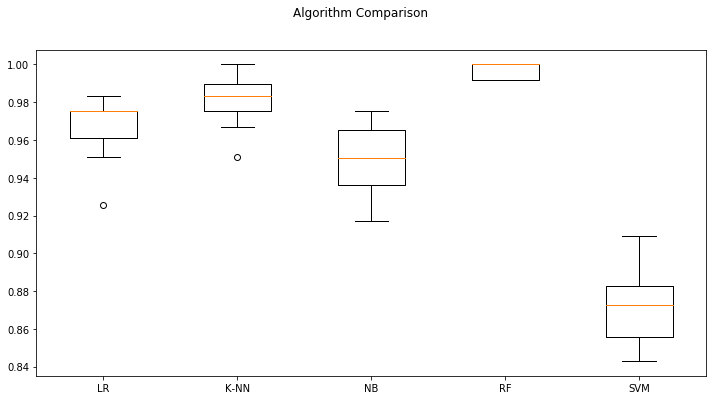

In [85]:
# Comparing Algorithms
fig = plt.figure(figsize=(12, 6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

# Random Forest is behaving very good in compare to other algoriths and giving around 100% accuracy or confidence score.

# Random Forest¶

RandomForest is a tree based bootstrapping algorithm wherein a certain no. of weak learners (decision trees) are combined to make a powerful prediction model.
For every individual learner, a random sample of rows and a few randomly chosen variables are used to build a decision tree model.
Final prediction can be a function of all the predictions made by the individual learners.
In case of regression problem, the final prediction can be mean of all the predictions.

# Tuning model with hyperparameter to handle Large volume of data at real time.

We will try to improve the accuracy by tuning the hyperparameters for this model. We will use grid search to get the optimized values of hyper parameters. Grid-search is a way to select the best of a family of hyper parameters, parametrized by a grid of parameters.

We will tune the max_depth and n_estimators parameters. max_depth decides the maximum depth of the tree and n_estimators decides the number of trees that will be used in random forest model.

In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter sets to test
param_grid = {'n_estimators': [1, 50], 'max_features': ['auto', 'log2'], 'max_depth': list(range(1, 20, 2)), 'criterion': ['gini', 'entropy']}

# Define the model to use
model = RandomForestClassifier(class_weight='balanced',random_state=5)

# Combine the parameter sets with the defined model
CV_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

CV_model.fit(X_train, y_train)
CV_model.best_params_

#model.fit(X_train, y_train)

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'auto',
 'n_estimators': 50}

Model will be made by Using 50 trees(50 times training the same data), balanced distribution of classes by class weight and measure creteria is gini which shows the probability of missclassification(errors) 

In [87]:
# Make predictions on validation dataset by choosing best Algorithm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
model = RandomForestClassifier(class_weight='balanced', random_state=42,criterion='gini',
                                  max_depth=3,max_features='auto',n_estimators= 50)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy : ", accuracy_score(y_test, y_pred))

Accuracy :  1.0


# Save and Load the model for future purpose. We dont need to train and test again and again. We will use the saved model and feed the new data to predict.
We will have to run the code from starting or do every preprocesing steps but instead of doing splitting,training and test we will directly use saved model.

In [88]:
# save the model to disk
import pickle
filename = 'finalized_server_model.sav'
pickle.dump(model, open(filename, 'wb'))

# some time later............

In [89]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print("Acuracy Score", result)

Acuracy Score 1.0


Above prediction shows the 100% accuracy and Below code the comparision of actual and predicted values

# Get sample records to test manually or give input from user and predict the result.

In [90]:
X.columns # These will be the columns which will used to do prediction.

Index(['Used Memory', 'Free Memory', 'Load-1Min', 'Load-5Min', 'Load-15Min',
       'Used_Memory_%', 'Total CPU time since boot',
       'Total CPU Idle time since boot', 'Total CPU usage time since boot',
       'Total CPU percentage'],
      dtype='object')

In [91]:
# df[df['Server Status']=="Critical"].head()
# df[df['Server Status']=="Warning"].head()
df[df['Server Status']=="Normal"].head()

,DateTime,Used Memory,Free Memory,Load-1Min,Load-5Min,Load-15Min,Server Status,Used_Memory_%,Total CPU time since boot,Total CPU Idle time since boot,Total CPU usage time since boot,Total CPU percentage
0,08-04-2019 23:55,5036,1111,0.01,0.06,0.10,Normal,64.374281,100.01,69.39,30.62,30.616938
1,09-04-2019 00:00,5021,1126,0.06,0.06,0.08,Normal,64.182539,100.00,87.50,12.50,12.500000
2,09-04-2019 00:05,5025,1109,0.07,0.05,0.07,Normal,64.233670,100.00,74.87,25.13,25.130000
3,09-04-2019 00:10,5023,824,0.00,0.04,0.05,Normal,64.208104,100.00,87.31,12.69,12.690000
4,09-04-2019 00:15,5027,814,0.21,0.14,0.08,Normal,64.259236,100.01,53.54,46.47,46.465353


# Manual Prediction of Load Status

In [92]:
# We have used 'Used Memory', 'Free Memory', 'Load-1Min', 'Load-5Min', 'Load-15Min','Used_Memory_%', 'Total CPU time since boot',
#Total CPU Idle time since boot', 'Total CPU usage time since boot','Total CPU percentage' to predict the Load status.
# Change the entry in the same sequence.

X_manual_test=[['5666','498','0.04','0.23','0.41','72.427457','100.0','86.87','13.13','13.13'],
               ['5218','619','0.33','0.11','0.07','66.700754','100','0','100','100'],
                ['5036','1111','0.01','0.06','0.10','64.374281','100.01','69.39','30.62','30.616938']]
y_manual_pred = loaded_model.predict(X_manual_test)
y_manual_pred

array(['Critical', 'Warning', 'Normal'], dtype=object)

# Comparsion of Sample input and predicted records

In [94]:
results = pd.DataFrame( { 'actual':  y_test,
                                   'predicted': y_pred })

results = results.reset_index()
results.head()

#Note :- If you want to see all the classes then just use write results and then enter instaed of results.head().

,index,actual,predicted
0,1300,Normal,Normal
1,232,Warning,Warning
2,1225,Normal,Normal
3,1690,Normal,Normal
4,51,Normal,Normal


# Classification report and Confusion Matrix which shows how accurate your Model is

In [95]:
#Classification Report and confusing matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[ 10   0   0]
 [  0 340   0]
 [  0   0 171]]
              precision    recall  f1-score   support

    Critical       1.00      1.00      1.00        10
      Normal       1.00      1.00      1.00       340
     Warning       1.00      1.00      1.00       171

   micro avg       1.00      1.00      1.00       521
   macro avg       1.00      1.00      1.00       521
weighted avg       1.00      1.00      1.00       521



Text(0.5,15,'Predicted Result')

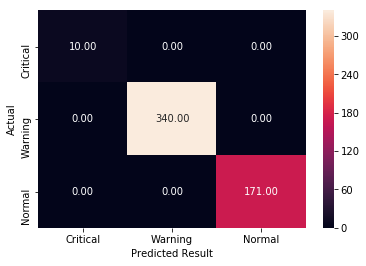

In [116]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True,  fmt='.2f', xticklabels = ["Critical", "Warning","Normal"] , yticklabels = ["Critical", "Warning","Normal"] )
plt.ylabel('Actual')
plt.xlabel('Predicted Result')

# How good is the model? It will depends on others factors like Recall, Precision, specificity.

1) Accuracy Score is:  0.85 that means 85% is the fraction of predictions our model got right. (TP+TN)/TP+TN+FP+FN

2) recall score is: .85 that means Number of items correctly identified as positive out of total true positives. High recall means you’re not missing many positives. Recall means Sensitivity or you can say True Positive Rate -- TP/TP+FN

3) precision score is:.85 means Number of items correctly identified as positive out of total items identified as positive.  High precision means low “false alarm rate” (if you test positive, you’re probably positive) - TP/TP+FP

4) Specificity(True Negative Rate) is: Number of items correctly identified as negative out of total true negatives.Formula is TN/TN+FN

5) f1 score is:.85 means Harmonic mean of precision and recall - (2*precision *recall)/precision +recall

6) support is the number of samples of the true response that lie in that class.

# Prection for Application Failure at Real Time

In [97]:
df_application =pd.read_csv("C:/Users/rimanshu/Desktop/Jupyter/raw_data/POC/application log.csv")
df_application.head()

,DateTime,IP,URL,Request Count,Average Time in sec,Application Status
0,09-04-2019 00:00,10.128.2.1,POST /process.php HTTP/1.1,260,1.3,Normal
1,09-04-2019 00:10,10.131.2.1,GET /js/vendor/moment.min.js HTTP/1.1,260,1.3,Normal
2,09-04-2019 00:35,10.131.2.1,GET /edit.php?name=bala HTTP/1.1,260,1.3,Normal
3,09-04-2019 00:45,10.131.2.1,GET /logout.php HTTP/1.1,260,1.3,Normal
4,09-04-2019 01:00,10.130.2.1,GET /login.php HTTP/1.1,260,1.3,Normal


# Merge the server details and Application Details

In [98]:
merge_df = pd.merge(df_application,
                 df[['DateTime', 'Used_Memory_%', 'Server Status', 'Total CPU percentage','Load-5Min']],
                 on='DateTime')
merge_df.head()

,DateTime,IP,URL,Request Count,Average Time in sec,Application Status,Used_Memory_%,Server Status,Total CPU percentage,Load-5Min
0,09-04-2019 00:00,10.128.2.1,POST /process.php HTTP/1.1,260,1.3,Normal,64.182539,Normal,12.50,0.06
1,09-04-2019 00:10,10.131.2.1,GET /js/vendor/moment.min.js HTTP/1.1,260,1.3,Normal,64.208104,Normal,12.69,0.04
2,09-04-2019 00:35,10.131.2.1,GET /edit.php?name=bala HTTP/1.1,260,1.3,Normal,64.208104,Normal,12.06,0.07
3,09-04-2019 00:45,10.131.2.1,GET /logout.php HTTP/1.1,260,1.3,Normal,64.208104,Normal,7.50,0.07
4,09-04-2019 01:00,10.130.2.1,GET /login.php HTTP/1.1,260,1.3,Normal,64.208104,Normal,9.55,0.05


In [99]:
merge_df['Application Status'].value_counts(normalize=True)*100

Normal    97.962649
Failed     2.037351
Name: Application Status, dtype: float64

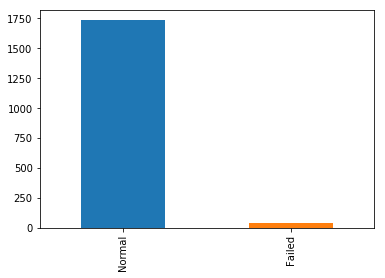

In [100]:
merge_df['Application Status'].value_counts().plot.bar()

In [101]:
merge_df.columns

Index(['DateTime', 'IP', 'URL', 'Request Count', 'Average Time in sec',
       'Application Status', 'Used_Memory_%', 'Server Status',
       'Total CPU percentage', 'Load-5Min'],
      dtype='object')

# Splitting, training and Testing of data into 70:30 ratio

In [102]:
from sklearn.model_selection import train_test_split
X1 = merge_df.drop(["Application Status","DateTime","Server Status","URL","IP"], axis =1)
y1= merge_df["Application Status"]

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=42)

# Comparision of different models to select best for prediction

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import model_selection


# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('K-NN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC()))

In [104]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=42)
    cv_results = model_selection.cross_val_score(model, X_train1, y_train1, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 1.000000 (0.000000)
K-NN: 1.000000 (0.000000)
NB: 0.972495 (0.015389)
RF: 0.999194 (0.002419)
SVM: 0.981386 (0.010269)


# Hyperparameter Tunning and Random Forest model to Implement

In [105]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter sets to test
param_grid1 = {'n_estimators': [1, 50], 'max_features': ['auto', 'log2'], 'max_depth': list(range(1, 20, 2)), 'criterion': ['gini', 'entropy']}

# Define the model to use
model1 = RandomForestClassifier(class_weight='balanced',random_state=5)

# Combine the parameter sets with the defined model
CV_model1 = GridSearchCV(estimator=model1, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

CV_model1.fit(X_train1, y_train1)
CV_model1.best_params_

#model.fit(X_train, y_train)

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'auto',
 'n_estimators': 50}

Model will be made by Using 50 trees(50 times training the same data), balanced distribution of classes by class weight and measure creteria is gini which shows the probability of missclassification(errors) 

In [106]:
# Make predictions on validation dataset by choosing best Algorithm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
model1 = RandomForestClassifier(class_weight='balanced', random_state=42,criterion='gini',
                                  max_depth=3,max_features='auto',n_estimators= 50)
model1.fit(X_train1, y_train1)
y_pred1 = model1.predict(X_test1)
print("Accuracy : ", accuracy_score(y_test1, y_pred1))

Accuracy :  1.0


# RelationShip of application data and Server data

In [107]:
merge_df.sort_values(by=['Used_Memory_%'],ascending=False).head()

,DateTime,IP,URL,Request Count,Average Time in sec,Application Status,Used_Memory_%,Server Status,Total CPU percentage,Load-5Min
1766,09-04-2019 13:00,10.131.2.1,GET /archive.php HTTP/1.1,950,12.5,Failed,76.339000,Critical,13.640000,0.86
1765,09-04-2019 14:40,10.130.2.1,GET /contest.php HTTP/1.1,860,11.2,Failed,74.690017,Critical,22.340000,0.64
1764,12-04-2019 16:15,10.129.2.1,GET /login.php HTTP/1.1,845,10.8,Failed,74.562188,Critical,17.521752,0.46
1763,12-04-2019 16:05,10.129.2.1,GET /login.php HTTP/1.1,845,10.6,Failed,74.562188,Critical,8.590000,0.60
1762,09-04-2019 12:45,10.130.2.1,GET /countdown.php?name=RUET%20OJ%20Server%20T...,840,10.5,Failed,74.319315,Critical,16.750000,1.04


# Save and Load the model for future purpose. We dont need to train and test again and again. We will use the saved model and feed the new data to predict.
We will have to run the code from starting or do every preprocesing steps but instead of doing splitting,training and test we will directly use saved model.

In [108]:
# save the model to disk
import pickle
filename = 'finalized_application_model.sav'
pickle.dump(model1, open(filename, 'wb'))

# some time later............

In [109]:
# load the model from disk
loaded_model1 = pickle.load(open(filename, 'rb'))
result = loaded_model1.score(X_test1, y_test1)
print("Acuracy Score", result) 

Acuracy Score 1.0


In [110]:
merge_df[merge_df["Application Status"]=="Failed"].head()
#merge_df[merge_df["Application Status"]=="Normal"].head()

,DateTime,IP,URL,Request Count,Average Time in sec,Application Status,Used_Memory_%,Server Status,Total CPU percentage,Load-5Min
1610,12-04-2019 16:40,10.129.2.1,GET /css/style.css HTTP/1.1,750,6.8,Failed,69.730283,Warning,12.188781,0.41
1611,12-04-2019 16:40,10.129.2.1,GET /css/style.css HTTP/1.1,750,6.8,Failed,73.258341,Critical,55.780000,0.38
1733,12-04-2019 12:35,10.131.0.1,GET /archive.php HTTP/1.1,615,5.1,Failed,72.082321,Critical,14.720000,0.68
1734,09-04-2019 12:55,10.131.2.1,GET /home.php HTTP/1.1,620,5.1,Failed,72.120670,Critical,11.220000,0.61
1735,10-04-2019 14:30,10.131.2.1,GET /edit.php?name=ksrsingh HTTP/1.1,620,5.1,Failed,72.120670,Critical,11.680000,0.75


In [111]:
# We have used 'Used_Memory_%','Total CPU percentage', 'Load-5Min' to predict the application status.
# Change the entry in the same sequence.

X_manual_test1=[[750,6.8,69.73,12.1887,0.41],
               [260,1.3,64.182539,12.50,0.06]]
y_manual_pred1 = loaded_model1.predict(X_manual_test1)
y_manual_pred1

array(['Failed', 'Normal'], dtype=object)

In [112]:
results = pd.DataFrame( { 'actual':  y_test1,
                                   'predicted': y_pred1 } )

results = results.reset_index()
results.head()

,index,actual,predicted
0,1560,Normal,Normal
1,212,Normal,Normal
2,1586,Normal,Normal
3,836,Normal,Normal
4,1245,Normal,Normal


# Accuracy Score is 97% and Recall score is 98%.

In [113]:
#Classification Report and confusing matrix
print(confusion_matrix(y_test1, y_pred1))
print(classification_report(y_test1, y_pred1))


[[ 11   0]
 [  0 520]]
              precision    recall  f1-score   support

      Failed       1.00      1.00      1.00        11
      Normal       1.00      1.00      1.00       520

   micro avg       1.00      1.00      1.00       531
   macro avg       1.00      1.00      1.00       531
weighted avg       1.00      1.00      1.00       531



Text(0.5,15,'Predicted')

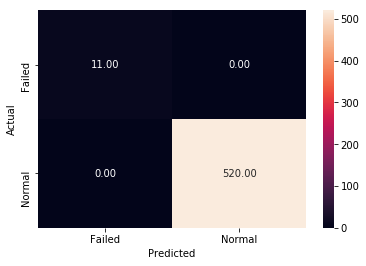

In [114]:
sns.heatmap(confusion_matrix(y_test1, y_pred1), annot=True,  fmt='.2f', xticklabels = ["Failed","Normal"] , yticklabels = ["Failed","Normal"] )
plt.ylabel('Actual')
plt.xlabel('Predicted')

# We have Concluded with Server Load Status and Application Status prediction with help of Real time application insight in DevOps life Cycle